60


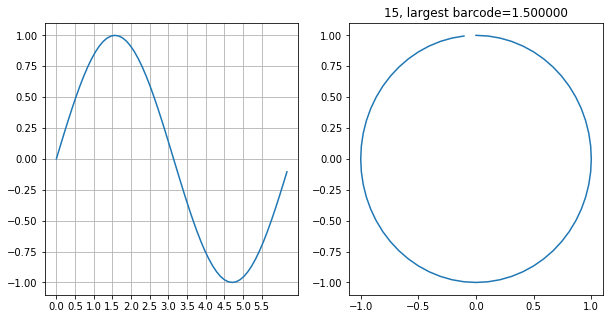

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
N=60  ##왠만하면 4의 배수.
Pi=np.pi
x=[2*Pi*i/N for i in range(N)]
y=np.sin(x)
#plt.plot(x,y)
#plt.show()
tau=15
X=y[:-tau]
Y=y[tau:]
#plt.plot(X,Y)
#plt.show()
extended_y=np.array(list(y)+list(y)[:tau])

fig=plt.figure(figsize=(10,5))
x_ticks=np.arange(0,6,0.5)
x_ticks2=np.arange(-2,2,0.5)
a=fig.add_subplot(1,2,1)
b=fig.add_subplot(1,2,2)

a.plot(x,y)
a.set_xticks(x_ticks)
a.grid(True)
tau=15
print(len(extended_y[tau:]))


X=extended_y[:-tau]
Y=extended_y[tau:]
#print(X[:5],Y[:5])
#axes[1].figure(figsize=(4,4))
b.set_xticks(x_ticks2)
b.plot(extended_y[:-tau],extended_y[tau:])
b.set_title('%d, largest barcode=%f'%(tau,1.5))
plt.show()



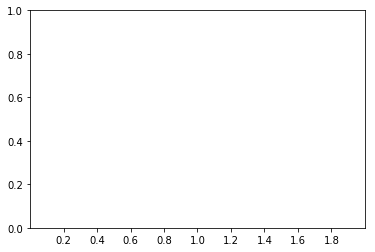

In [75]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_xlim([0,2])
xlabels2=np.arange(0.2,2,0.2)
ax.set_xticks(xlabels2)
plt.show()

In [76]:
np.sqrt(8)

2.8284271247461903

In [40]:
Centering([0,2])

array([-2.,  0.])

Deprecated parameter. It has been replaced by max_intervals


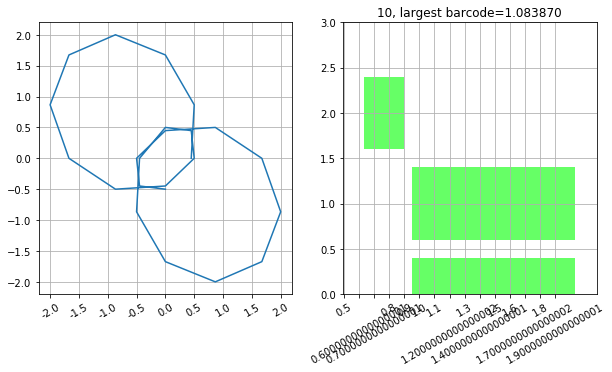

([(0.0, -0.5),
  (-0.44828773608402683, -0.44828773608402733),
  (-0.5, -2.449293598294706e-16),
  (0.0, 0.4482877360840271),
  (0.8660254037844385, 0.5000000000000002),
  (1.6730326074756157, 1.3322676295501878e-15),
  (2.0, -0.866025403784438),
  (1.673032607475616, -1.673032607475616),
  (0.8660254037844389, -2.0),
  (2.220446049250313e-16, -1.673032607475617),
  (-0.5, -0.8660254037844393),
  (-0.44828773608402733, 0.0),
  (-2.449293598294706e-16, 0.49999999999999956),
  (0.4482877360840271, 0.4482877360840271),
  (0.5000000000000002, 4.898587196589412e-16),
  (1.3322676295501878e-15, -0.4482877360840249),
  (-0.866025403784438, -0.5),
  (-1.673032607475616, -1.4432899320127035e-15),
  (-2.0, 0.8660254037844375),
  (-1.673032607475617, 1.6730326074756159),
  (-0.8660254037844393, 2.0),
  (0.0, 1.6730326074756172),
  (0.49999999999999956, 0.8660254037844402),
  (0.4482877360840271, 3.4416913763379853e-15)],
 1.0838703193801398)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
N=60  ##왠만하면 4의 배수.
tau=15
global Pi

Pi=np.pi
def MaxLenBarcode(diag):
    answer=0
    for d in diag:
        length=d[1][1]-d[1][0]
        answer=max(length,answer)
    return answer

def sine_plot(N,tau,a): #N은 왠만하면 4의 배수
    x=np.array([2*Pi*i/N for i in range(N)])
    y=np.sin(x)-np.sin(a*x)   ### 
    extended_x=np.array(list(x)+[2*Pi+e for e in x][:tau])
    extended_y=np.sin(extended_x)-np.sin(a*extended_x) ####
    #fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
   ## axes[0].plot(y[:-tau],y[tau:])
   ## axes[0].set(xlabel='function')
    fig=plt.figure(figsize=(10,5))
    a=fig.add_subplot(1,2,1)
    b=fig.add_subplot(1,2,2)
    xlabels=np.arange(-2,2.5,0.5)
    ylabels=xlabels.copy()
    a.set_xticks(xlabels)#,rotation=30)
    a.set_xticklabels(xlabels,rotation=30)
    xlabels2=np.arange(0,2,0.1)
   
   # axes[0].set_yticklabels(ylabels,rotation=30)

    a.plot(extended_y[:-tau],extended_y[tau:])#,axes=axes[1])
    a.grid(True)
   ## plt.plot(extended_x,extended_y)
   ## plt.show()
    rips = gudhi.RipsComplex(points=list(zip(list(extended_y[:-tau]),list(extended_y[tau:]))))
    simplex_tree = rips.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
    diag=[x for x in diag if x[0]==1]
 #   print(diag)
    b.set_xticklabels(xlabels2,rotation=30)
       # axes[0].set_yticklabels(ylabels,rotation=30)

    b.set_xlim(0,2)
    b.set_xticks(xlabels2)
    if diag==[]: 
        print('There is no H1')
        MaxLength=0
    else: 
        MaxLength=MaxLenBarcode(diag)
       #,rotation=30)
        
   #     print(diag)
        b = gudhi.plot_persistence_barcode(diag)
        
        b.grid(True)
        b.title('%d, largest barcode=%f'%(tau, MaxLength))
    plt.show()
    return list(zip(list(extended_y[:-tau]),list(extended_y[tau:]))),MaxLength



## gap=4pi/240 *tau 
sine_plot(24,10,3)

Deprecated parameter. It has been replaced by max_intervals


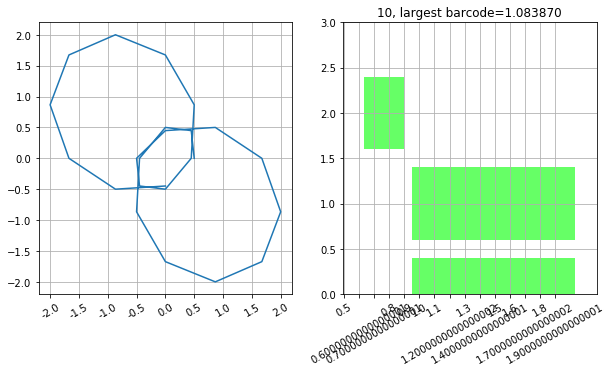

([(0.0, -0.5),
  (-0.44828773608402683, -0.44828773608402733),
  (-0.5, -2.449293598294706e-16),
  (0.0, 0.4482877360840271),
  (0.8660254037844385, 0.5000000000000002),
  (1.6730326074756157, 1.3322676295501878e-15),
  (2.0, -0.866025403784438),
  (1.673032607475616, -1.673032607475616),
  (0.8660254037844389, -2.0),
  (2.220446049250313e-16, -1.673032607475617),
  (-0.5, -0.8660254037844393),
  (-0.44828773608402733, 0.0),
  (-2.449293598294706e-16, 0.49999999999999956),
  (0.4482877360840271, 0.4482877360840271),
  (0.5000000000000002, 4.898587196589412e-16),
  (1.3322676295501878e-15, -0.4482877360840249),
  (-0.866025403784438, -0.5),
  (-1.673032607475616, -1.4432899320127035e-15),
  (-2.0, 0.8660254037844375),
  (-1.673032607475617, 1.6730326074756159),
  (-0.8660254037844393, 2.0),
  (0.0, 1.6730326074756172),
  (0.49999999999999956, 0.8660254037844402),
  (0.4482877360840271, 3.4416913763379853e-15)],
 1.0838703193801396)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
N=60  ##왠만하면 4의 배수.
tau=15
global Pi

Pi=np.pi
def MaxLenBarcode(diag):
    answer=0
    for d in diag:
        length=d[1][1]-d[1][0]
        answer=max(length,answer)
    return answer

def Centering_sine_plot(N,tau,a): #N은 왠만하면 4의 배수
    x=np.array([2*Pi*i/N for i in range(N)])
    y=np.sin(x)-np.sin(a*x)   ### 
    extended_x=np.array(list(x)+[2*Pi+e for e in x][:tau])
    extended_y=np.sin(extended_x)-np.sin(a*extended_x) ####
    #fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
   ## axes[0].plot(y[:-tau],y[tau:])
   ## axes[0].set(xlabel='function')
    fig=plt.figure(figsize=(10,5))
    a=fig.add_subplot(1,2,1)
    b=fig.add_subplot(1,2,2)
    xlabels=np.arange(-2,2.5,0.5)
    ylabels=xlabels.copy()
    a.set_xticks(xlabels)#,rotation=30)
    a.set_xticklabels(xlabels,rotation=30)
    xlabels2=np.arange(0,2,0.1)
    points=list(zip(list(extended_y[:-tau]),list(extended_y[tau:])))
    centered_points=[Centering(p) for p in points]
   # axes[0].set_yticklabels(ylabels,rotation=30)
    X=[cp[0] for cp in centered_points]
    Y=[cp[1] for cp in centered_points]
    a.plot(X,Y)#,axes=axes[1])
    a.grid(True)
   ## plt.plot(extended_x,extended_y)
   ## plt.show()
    rips = gudhi.RipsComplex(points=centered_points)
    simplex_tree = rips.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
    diag=[x for x in diag if x[0]==1]
 #   print(diag)
    b.set_xticklabels(xlabels2,rotation=30)
       # axes[0].set_yticklabels(ylabels,rotation=30)

    b.set_xlim(0,2)
    b.set_xticks(xlabels2)
    if diag==[]: 
        print('There is no H1')
        MaxLength=0
    else: 
        MaxLength=MaxLenBarcode(diag)
       #,rotation=30)
        
   #     print(diag)
        b = gudhi.plot_persistence_barcode(diag)
        
        b.grid(True)
        b.title('%d, largest barcode=%f'%(tau, MaxLength))
    plt.show()
    return list(zip(list(extended_y[:-tau]),list(extended_y[tau:]))),MaxLength



## gap=4pi/240 *tau 
Centering_sine_plot(24,10,3)

[1, 2]

In [26]:
def Euclidean_dist(U,V):
    return np.sqrt((U[0]-V[0])**2+(U[1]-V[1])**2)

def Slope(X1,X2):
    return (X2[1]-X1[1])/(X2[0]-X1[0])
np.inner([1,2],[1,3])

7

In [27]:
def Centering(X):
    n=len(X)
    term1=np.array(X)
    return X-np.inner(X,np.ones(n))*np.ones(n)
    
Centering([1,2])

array([-2., -1.])

Deprecated parameter. It has been replaced by max_intervals


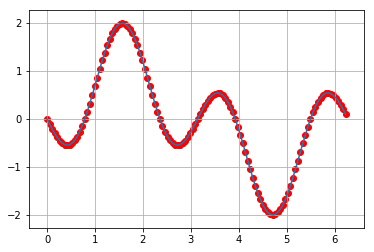

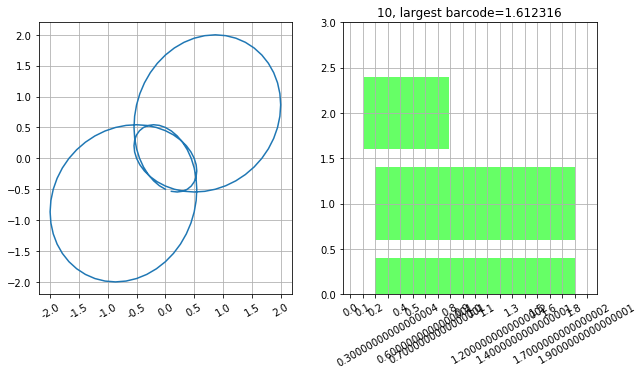

#### 10
Deprecated parameter. It has been replaced by max_intervals


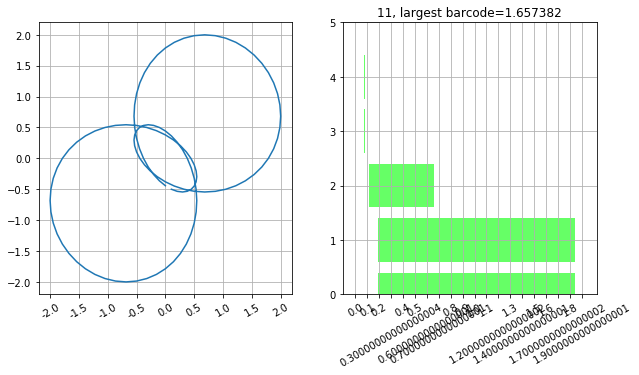

#### 11
Deprecated parameter. It has been replaced by max_intervals


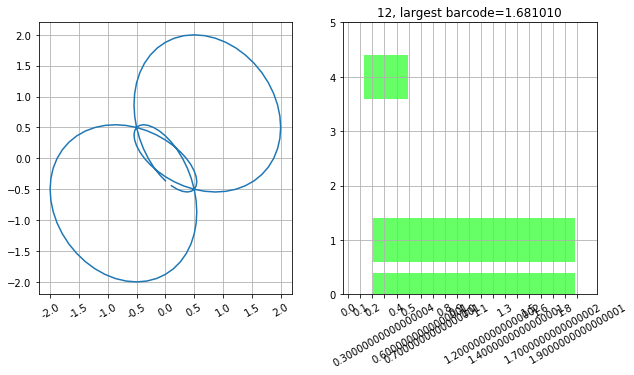

#### 12
Deprecated parameter. It has been replaced by max_intervals


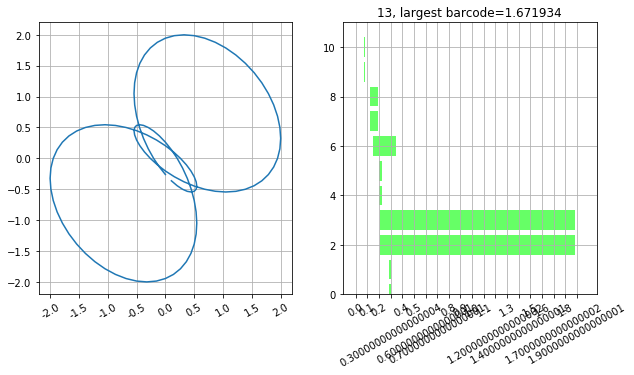

#### 13
Deprecated parameter. It has been replaced by max_intervals


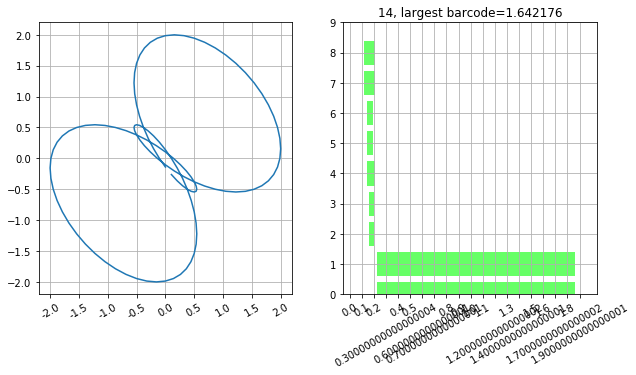

#### 14
Deprecated parameter. It has been replaced by max_intervals


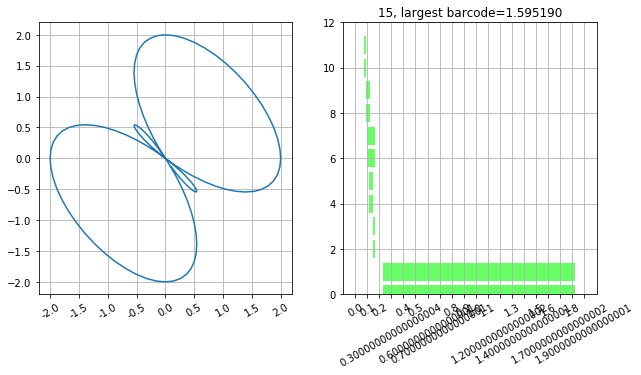

#### 15
Deprecated parameter. It has been replaced by max_intervals


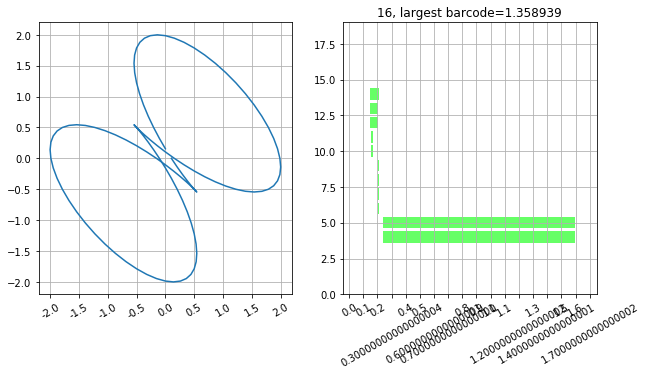

#### 16
Deprecated parameter. It has been replaced by max_intervals


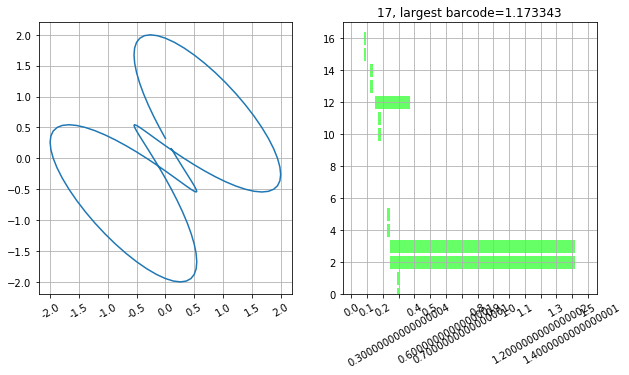

#### 17
Deprecated parameter. It has been replaced by max_intervals


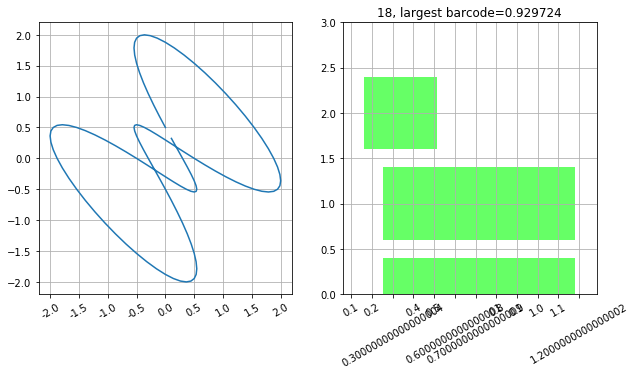

#### 18
Deprecated parameter. It has been replaced by max_intervals


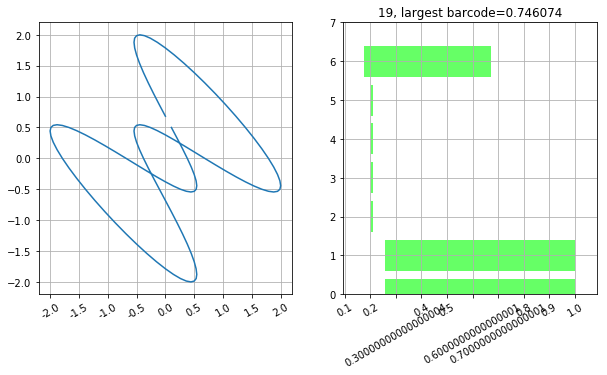

#### 19
Deprecated parameter. It has been replaced by max_intervals


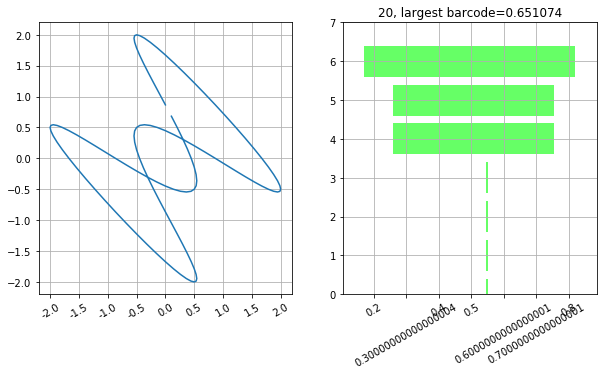

#### 20
Deprecated parameter. It has been replaced by max_intervals


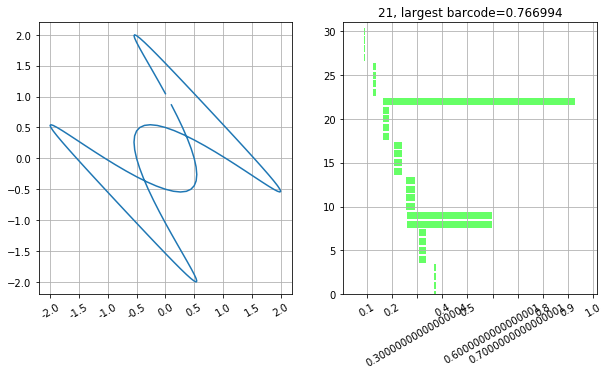

#### 21
Deprecated parameter. It has been replaced by max_intervals


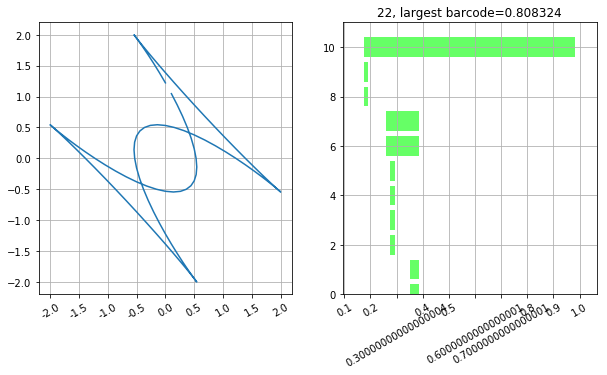

#### 22
Deprecated parameter. It has been replaced by max_intervals


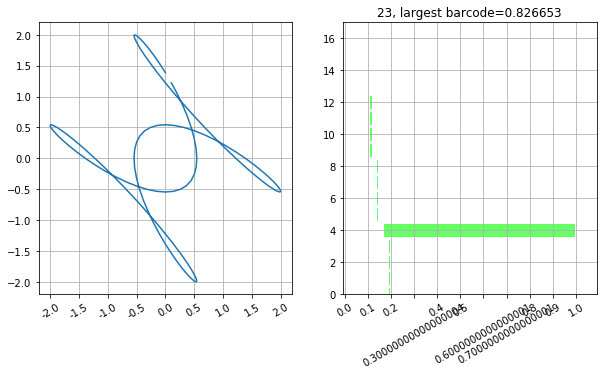

#### 23
Deprecated parameter. It has been replaced by max_intervals


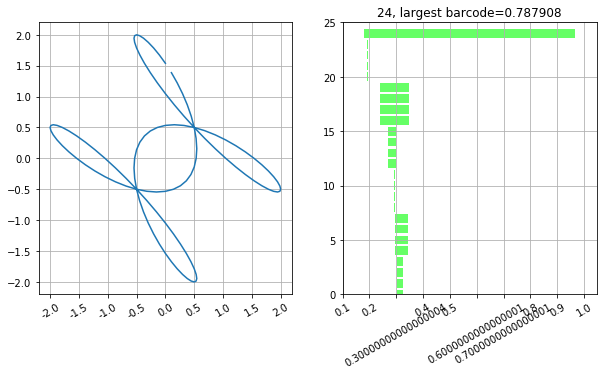

#### 24
Deprecated parameter. It has been replaced by max_intervals


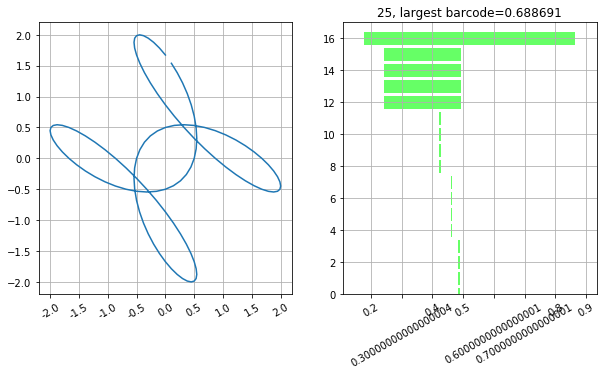

#### 25
Deprecated parameter. It has been replaced by max_intervals


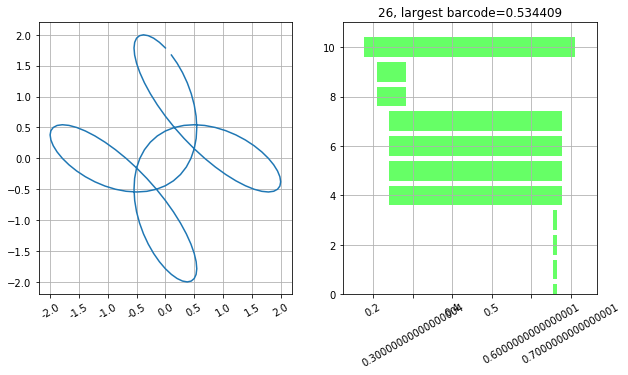

#### 26
Deprecated parameter. It has been replaced by max_intervals


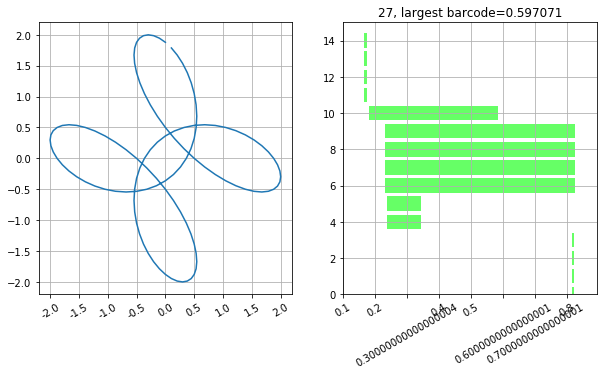

#### 27
Deprecated parameter. It has been replaced by max_intervals


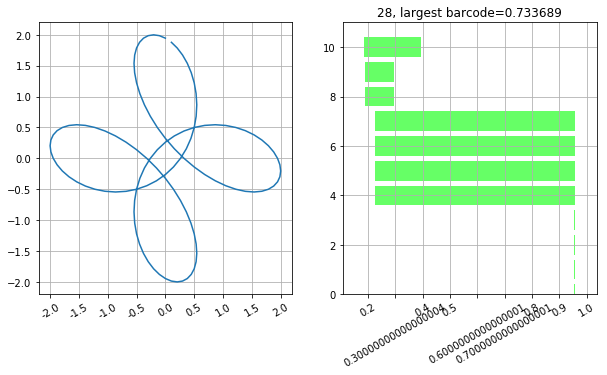

#### 28
Deprecated parameter. It has been replaced by max_intervals


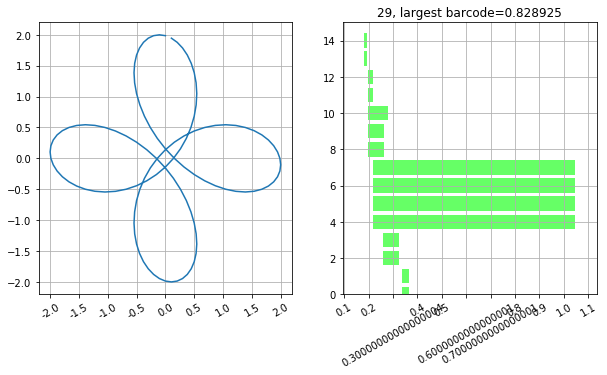

#### 29
Deprecated parameter. It has been replaced by max_intervals


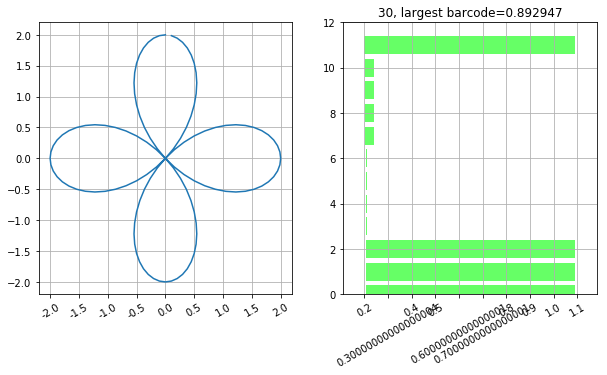

#### 30
Deprecated parameter. It has been replaced by max_intervals


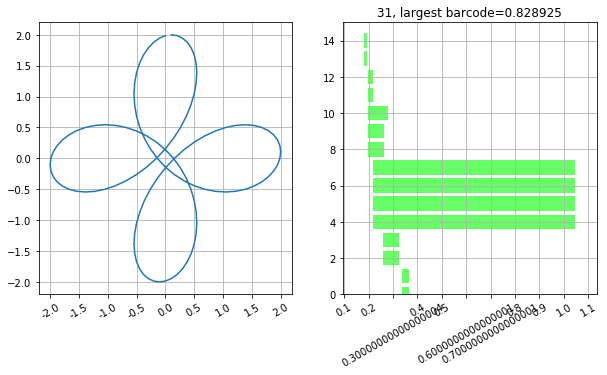

#### 31
Deprecated parameter. It has been replaced by max_intervals


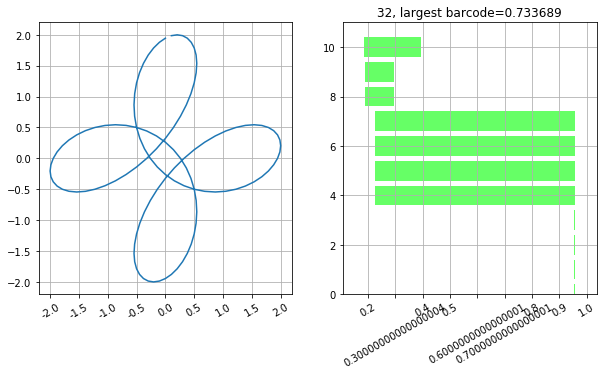

#### 32
Deprecated parameter. It has been replaced by max_intervals


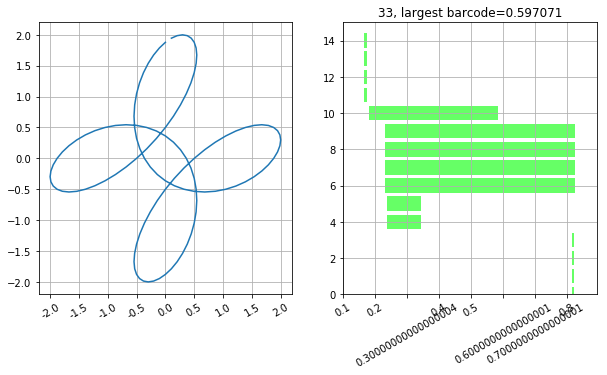

#### 33
Deprecated parameter. It has been replaced by max_intervals


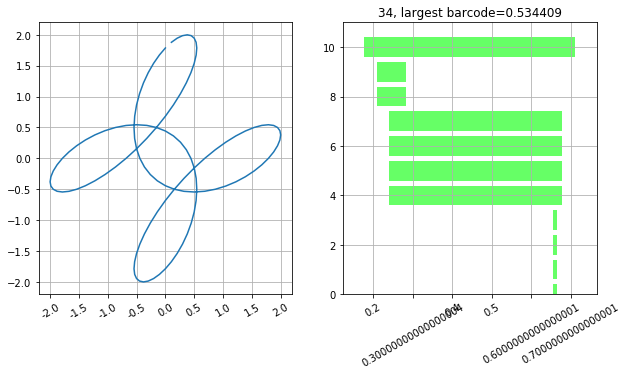

#### 34
Deprecated parameter. It has been replaced by max_intervals


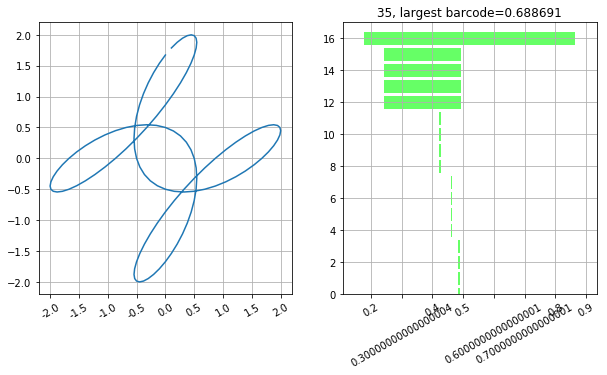

#### 35
Deprecated parameter. It has been replaced by max_intervals


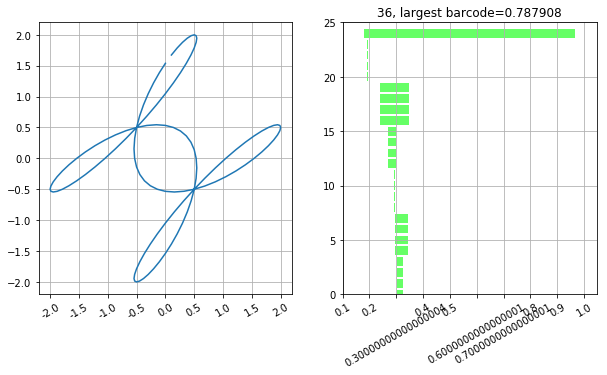

#### 36
Deprecated parameter. It has been replaced by max_intervals


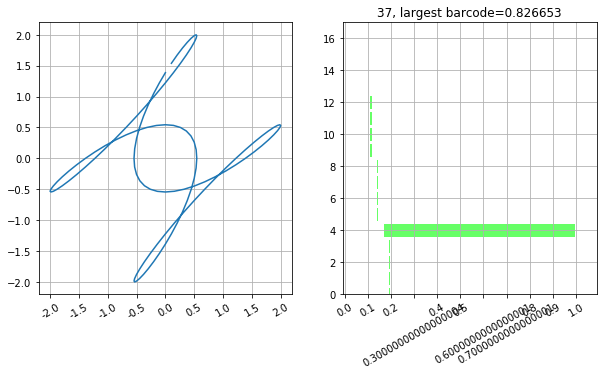

#### 37
Deprecated parameter. It has been replaced by max_intervals


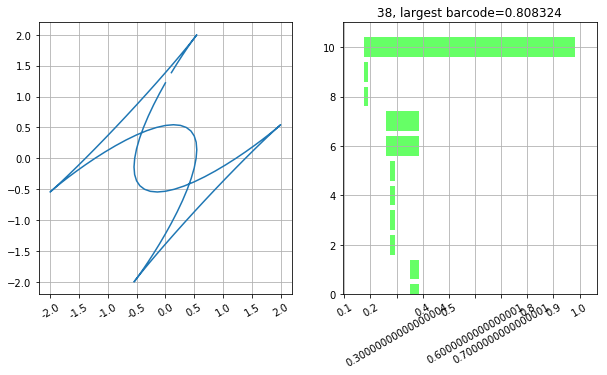

#### 38
Deprecated parameter. It has been replaced by max_intervals


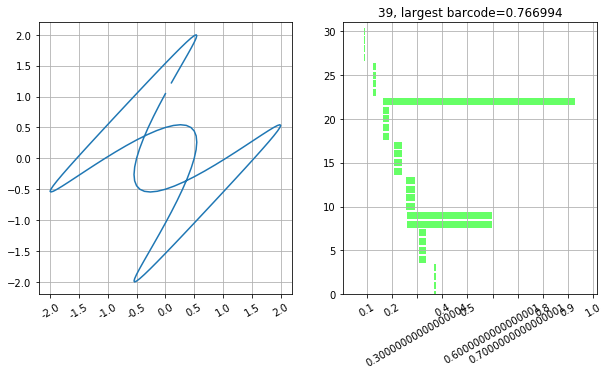

#### 39
Deprecated parameter. It has been replaced by max_intervals


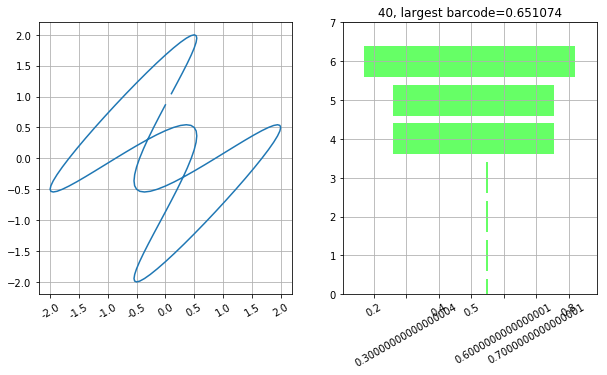

#### 40
Deprecated parameter. It has been replaced by max_intervals


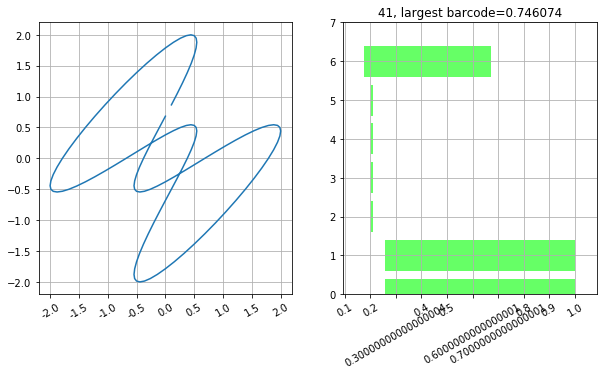

#### 41
Deprecated parameter. It has been replaced by max_intervals


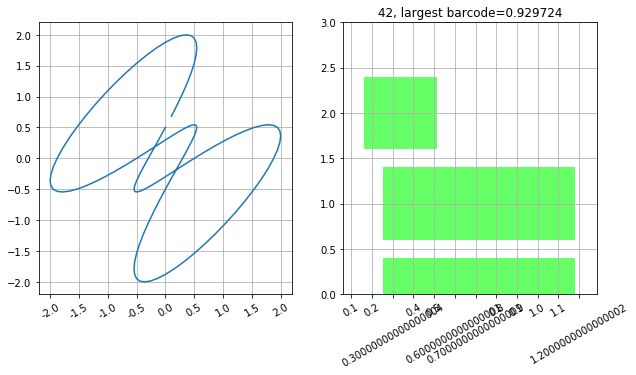

#### 42
Deprecated parameter. It has been replaced by max_intervals


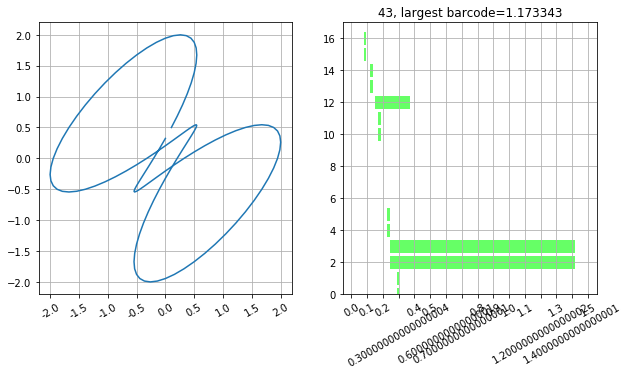

#### 43
Deprecated parameter. It has been replaced by max_intervals


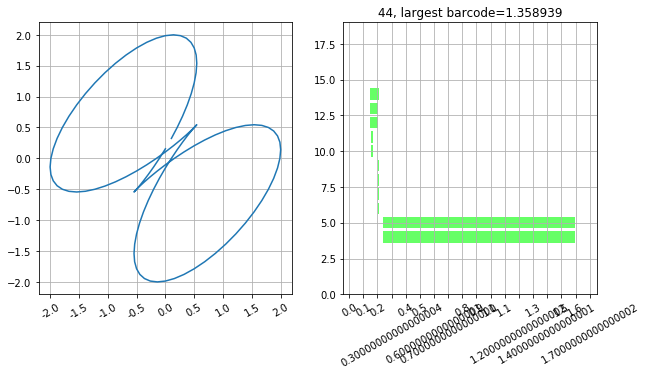

#### 44
Deprecated parameter. It has been replaced by max_intervals


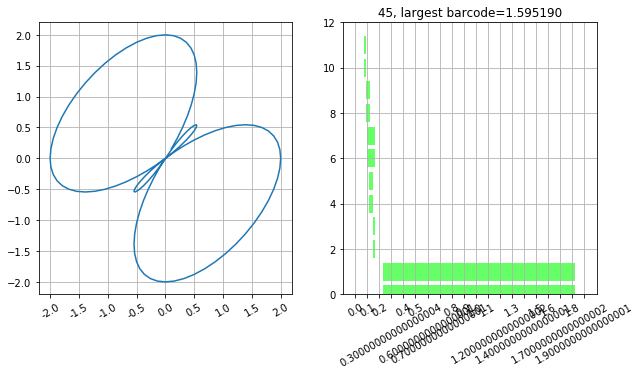

#### 45
Deprecated parameter. It has been replaced by max_intervals


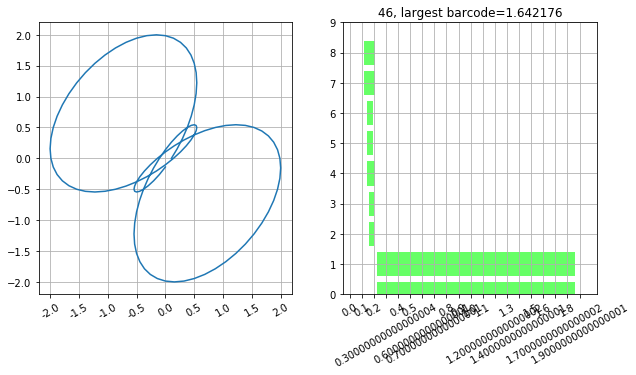

#### 46
Deprecated parameter. It has been replaced by max_intervals


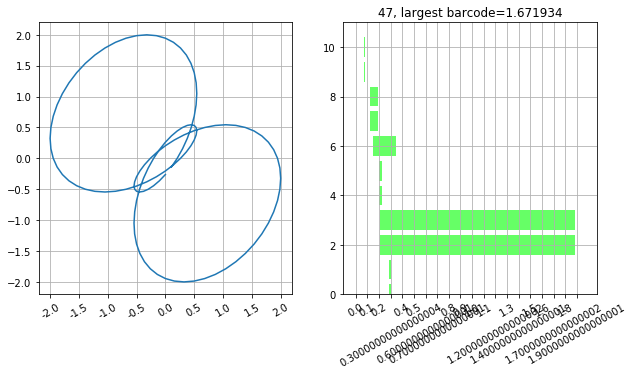

#### 47
Deprecated parameter. It has been replaced by max_intervals


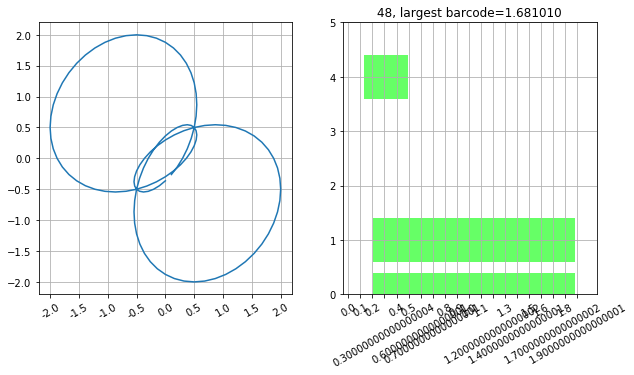

#### 48
Deprecated parameter. It has been replaced by max_intervals


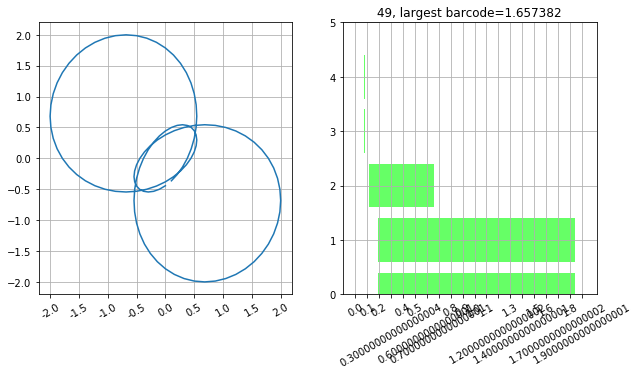

#### 49
Deprecated parameter. It has been replaced by max_intervals


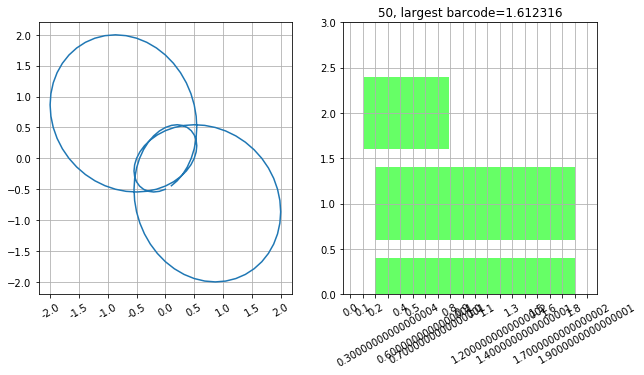

#### 50
Deprecated parameter. It has been replaced by max_intervals


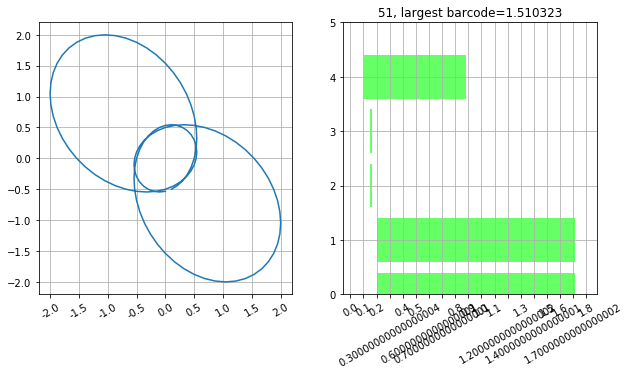

#### 51
Deprecated parameter. It has been replaced by max_intervals


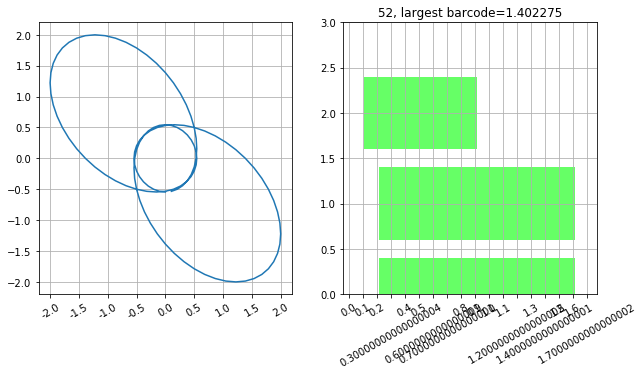

#### 52
Deprecated parameter. It has been replaced by max_intervals


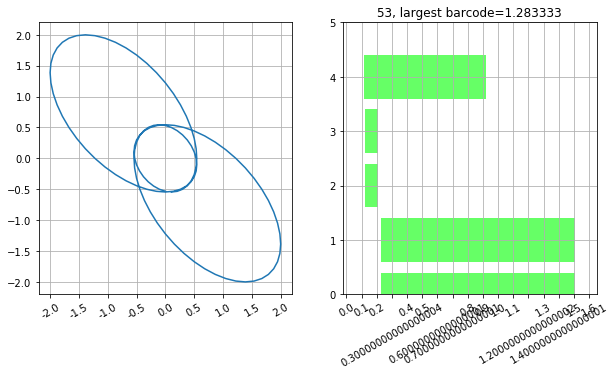

#### 53
Deprecated parameter. It has been replaced by max_intervals


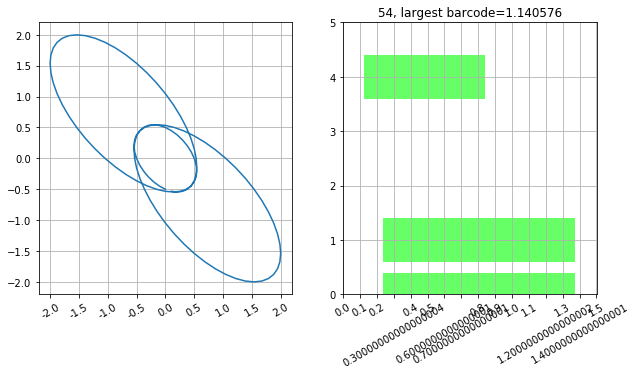

#### 54
Deprecated parameter. It has been replaced by max_intervals


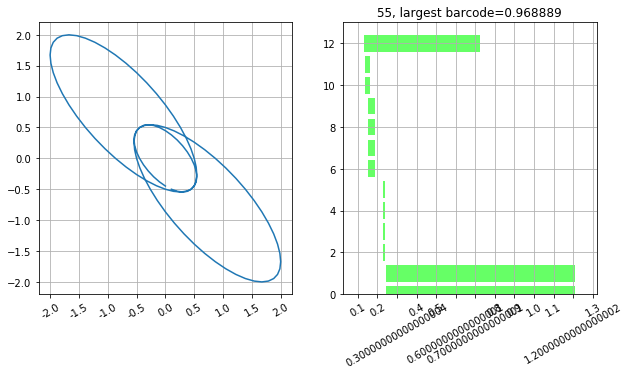

#### 55
Deprecated parameter. It has been replaced by max_intervals


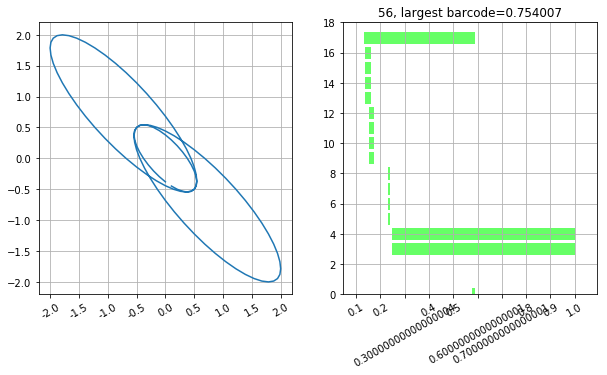

#### 56
Deprecated parameter. It has been replaced by max_intervals


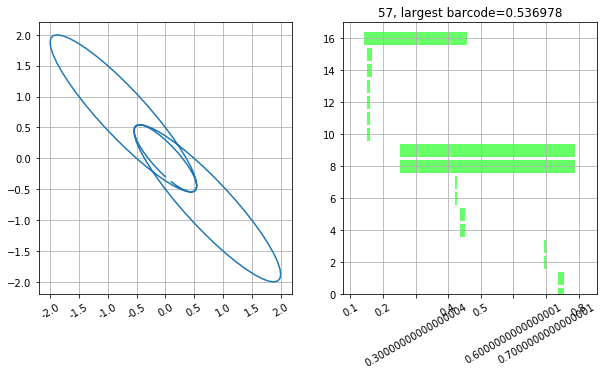

#### 57
Deprecated parameter. It has been replaced by max_intervals


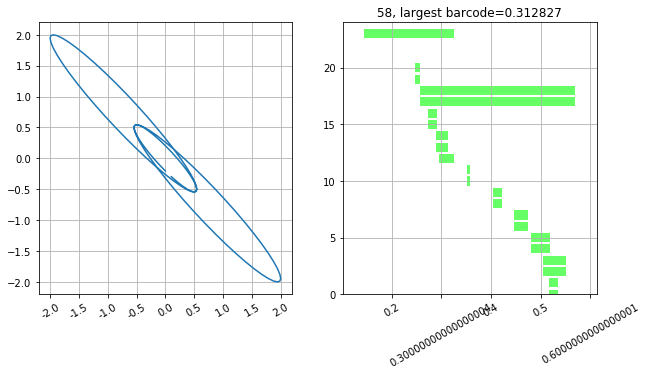

#### 58
Deprecated parameter. It has been replaced by max_intervals


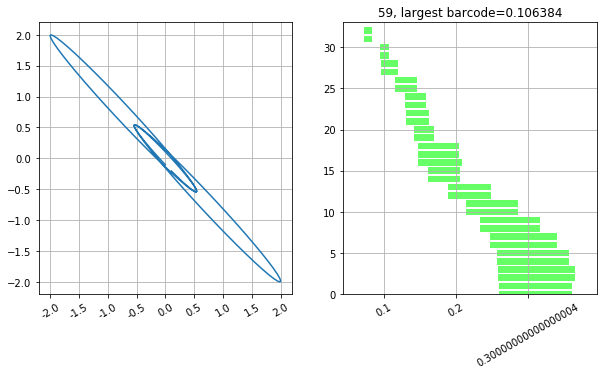

#### 59


In [23]:
a=3

N=120  #
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
plt.scatter(x,y,color='red')
plt.grid(True)
MaxLength=0

Tau=0
result=[1,0]
for i in range(10,N//2):
    Array,temp=sine_plot(N,i,a)
    if result[1]<=temp:
        result[1]=temp
        result[0]=i
    print('####',i)
  #  MaxLength=max(MaxLength,temp)
  #  U,V=(y[2],y[4]),(y[3],y[5])
#    print(Array[12])
 #   for t1 in range(10):
  #      for j in range(10):
   #         t2=(t1+j)
    #        U,V=Array[t1],Array[t2]
     #       if 1.88<Euclidean_dist(U,V)<1.89:
      #          print(t1,t2, U,V)
       #         print('distance',t1,t2, Euclidean_dist(U,V))
    
    #print(MaxLength)

In [24]:
a,result


(3, [12, 1.681009948236814])

In [54]:
Pi=np.pi
k=11/12
tau=k*Pi
print(abs(np.sin(2*tau)/np.sin(tau)),abs(np.sin(6*tau)/np.sin(3*tau)))

1.9318516525781364 1.4142135623730934


[(1, (1.1102802032775259, 1.883595287268046)), (1, (1.0809745907889174, 1.8456922365410173)), (1, (0.4390285525179978, 0.5140479409655662))]
Deprecated parameter. It has been replaced by max_intervals


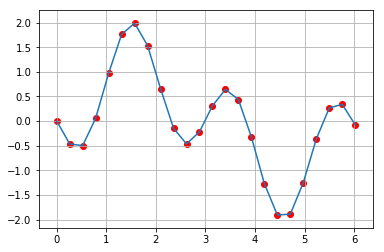

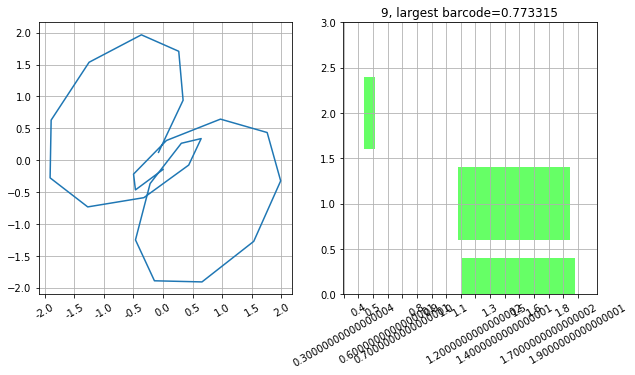

#### 9
(0.3090169943749472, 0.2652631392111289)
0 8 (0.0, -0.14553338316754472) (0.6581137129666802, -1.9085673173812472)
distance 0 8 1.8818613956356711
[(1, (1.106666378279871, 1.8189779017072987)), (1, (1.093918334023709, 1.6983652780712888)), (1, (0.5527253272454752, 0.7169754556691769)), (1, (0.4199754682324265, 0.47651544573051846))]
Deprecated parameter. It has been replaced by max_intervals


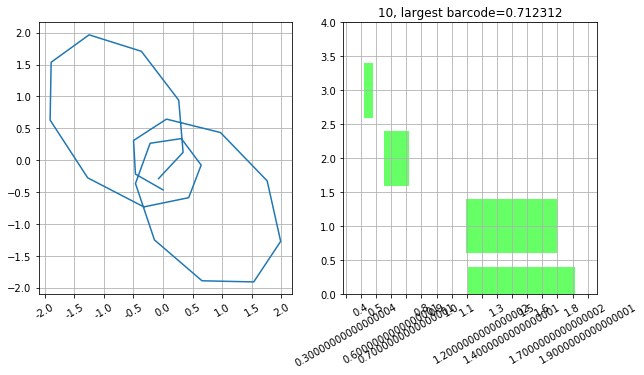

#### 10
(0.3090169943749472, 0.33867056794542505)
[(1, (0.4889891171357323, 0.5295630655372584))]
Deprecated parameter. It has been replaced by max_intervals


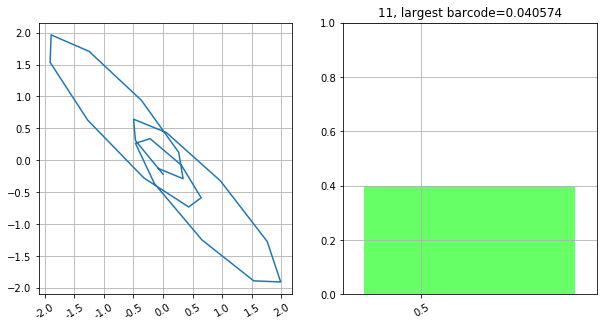

#### 11
(0.3090169943749472, -0.07658351961037238)
4 6 (0.9705538670520917, -0.3244233488214565) (1.9876883405951378, -1.9085673173812472)
distance 4 6 1.882571286935518
6 13 (1.9876883405951378, -1.9085673173812472) (0.64376623924734, -0.5877852522924727)
distance 6 13 1.8843014296951666
8 10 (0.6581137129666802, -1.2499411709929915) (-0.46592582628906803, 0.2652631392111289)
distance 8 10 1.8866130995706085


In [13]:
a=3.1

N=24  #
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
plt.scatter(x,y,color='red')
plt.grid(True)
MaxLength=0

Tau=0
for i in range(9,12):
    Array,temp=sine_plot(N,i,a)
    print('####',i)
    MaxLength=max(MaxLength,temp)
    U,V=(y[2],y[4]),(y[3],y[5])
    print(Array[12])
    for t1 in range(10):
        for j in range(10):
            t2=(t1+j)
            U,V=Array[t1],Array[t2]
            if 1.88<Euclidean_dist(U,V)<1.89:
                print(t1,t2, U,V)
                print('distance',t1,t2, Euclidean_dist(U,V))
    
    #print(MaxLength)

[(1, (0.9743847173200121, 1.8235679543454206)), (1, (0.9590588809329116, 1.7248014577273227)), (1, (0.5994330516020192, 0.7723183628188662)), (1, (0.7005231543336209, 0.7014711362225975))]
Deprecated parameter. It has been replaced by max_intervals


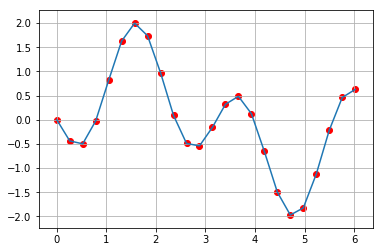

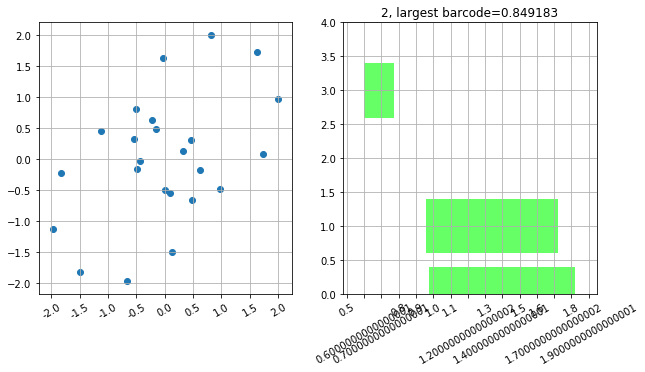

#### 2
distance 22 3 1.4031239315164328
distance 22 4 1.7248014577273227
distance 22 5 1.8421115617918957
distance 22 6 1.6743283004075211
distance 22 7 1.2949463090456883
distance 21 4 1.7159071409141233
10 16 (-0.49144486137381055, -0.15643446504023023) (-0.6581137129666792, -1.9723699203976766)
distance 10 16 1.8235679543454206


In [60]:
a=2.95
N=24  #
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
plt.scatter(x,y,color='red')
plt.grid(True)
MaxLength=0

Tau=0
for i in range(2,3):
    Array,temp=sine_plot(N,i,a)
    print('####',i)
    MaxLength=max(MaxLength,temp)
    t1,t2=22,3
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=22,4
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=22,5
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=22,6
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=22,7
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=21,4
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    
    for t1 in range(16):
        for j in range(7):
            t2=(t1+j)
            U,V=Array[t1],Array[t2]
            if 1.8<Euclidean_dist(U,V)<1.83:
                print(t1,t2, U,V)
                print('distance',t1,t2, Euclidean_dist(U,V))
    
    #print(MaxLength)

[(1, (0.9090953529032156, 1.9789399849918987)), (1, (0.9195614503865955, 1.816592056807915))]
Deprecated parameter. It has been replaced by max_intervals


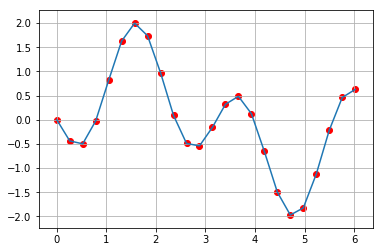

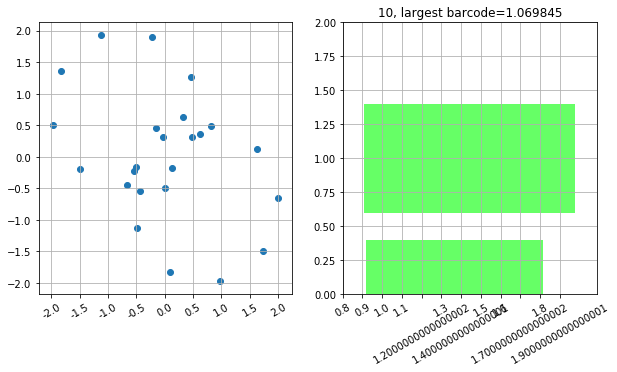

#### 10
distance 12 21 1.4372557439057068
distance 0 9 1.3367878633271681
distance 0 6 2.003860609886604
distance 0 5 1.7380238843103866
distance 0 7 2.0064085643189005
distance 15 8 1.9789399849918987
0 5 (0.0, -0.49144486137381055) (1.6252716413891375, 0.12436283111599844)
distance 0 5 1.7380238843103866
0 8 (0.0, -0.49144486137381055) (0.9705538670520921, -1.9723699203976766)
distance 0 8 1.7706252678911512


In [74]:
a=2.95
N=24  #
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
plt.scatter(x,y,color='red')
plt.grid(True)
MaxLength=0

Tau=0
for i in range(10,11):
    Array,temp=sine_plot(N,i,a)
    print('####',i)
    MaxLength=max(MaxLength,temp)
    t1,t2=12,21
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=0,9
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=0,6
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=0,5
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=0,7
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    t1,t2=15,8
    U,V=Array[t1],Array[t2]
    print('distance',t1,t2, Euclidean_dist(U,V))
    
    for t1 in range(0,1):
        for j in range(10):
            t2=(t1+j)
            U,V=Array[t1],Array[t2]
            if 1.7<Euclidean_dist(U,V)<1.99:
                print(t1,t2, U,V)
                print('distance',t1,t2, Euclidean_dist(U,V))
    
    #print(MaxLength)

In [98]:
def Euclidean_dist(U,V):
    return np.sqrt((U[0]-V[0])**2+(U[1]-V[1])**2)

Euclidean_dist((0.0, -0.49144486137381055), (0.9705538670520921, -1.9723699203976766))/2

0.8853126339455756

Deprecated parameter. It has been replaced by max_intervals


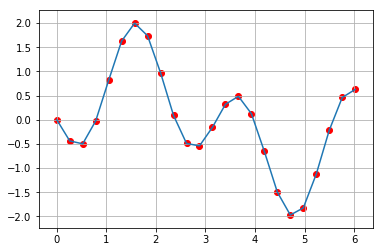

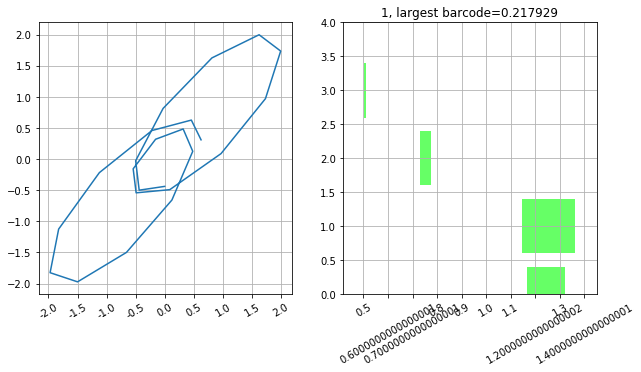

Deprecated parameter. It has been replaced by max_intervals


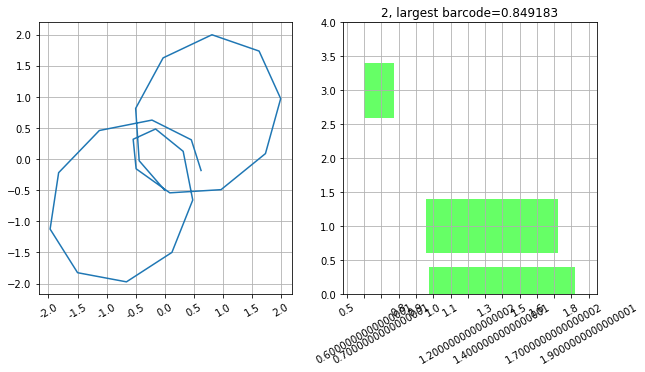

Deprecated parameter. It has been replaced by max_intervals


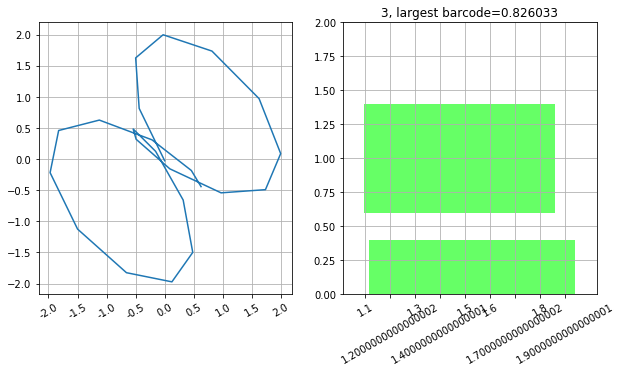

Deprecated parameter. It has been replaced by max_intervals


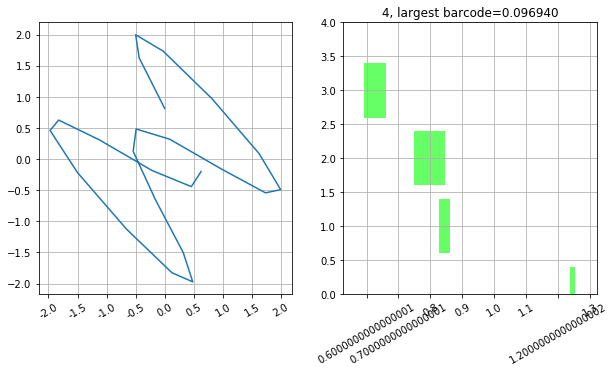

Deprecated parameter. It has been replaced by max_intervals


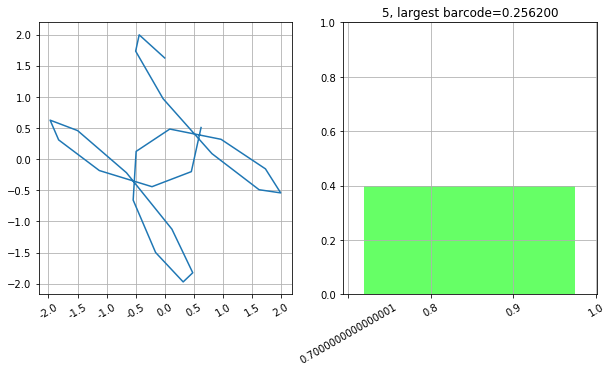

Deprecated parameter. It has been replaced by max_intervals


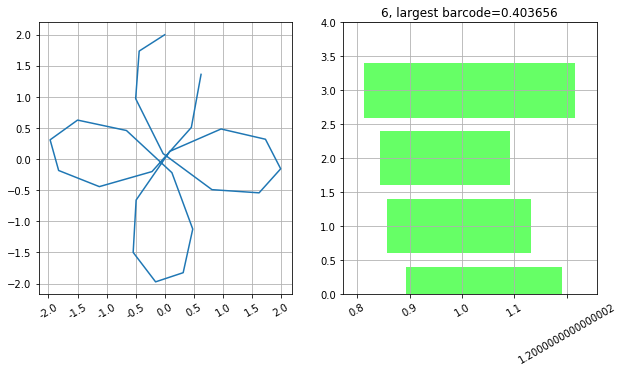

Deprecated parameter. It has been replaced by max_intervals


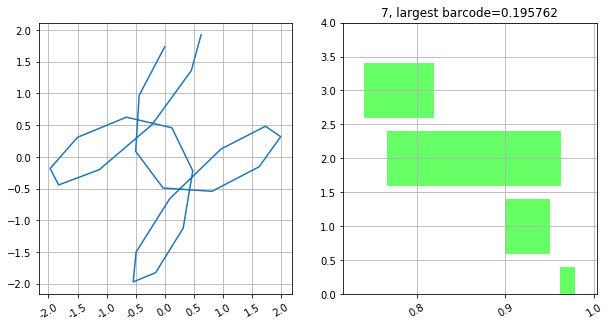

Deprecated parameter. It has been replaced by max_intervals


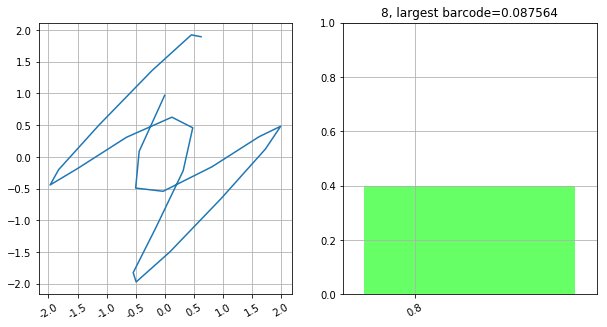

Deprecated parameter. It has been replaced by max_intervals


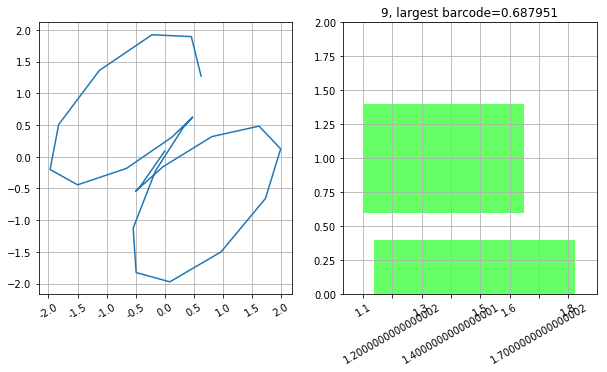

Deprecated parameter. It has been replaced by max_intervals


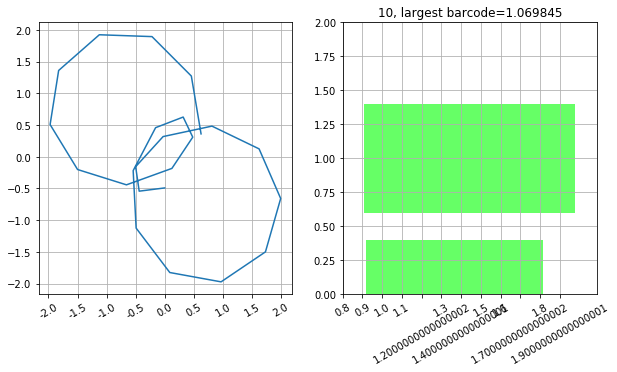

Deprecated parameter. It has been replaced by max_intervals


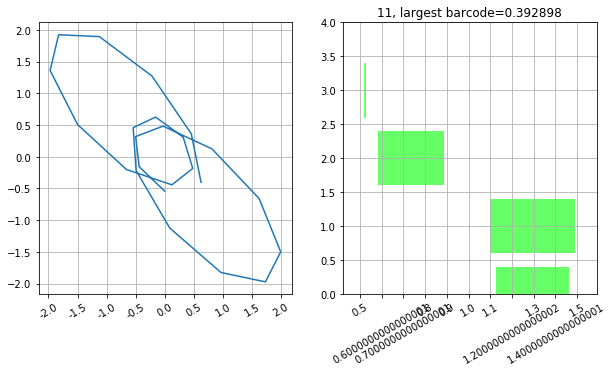

1.069844632088683


In [72]:
a=2.95
N=24
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
plt.scatter(x,y,color='red')
plt.grid(True)
MaxLength=0
Tau=0
for i in range(1,12):
    Array,temp=sine_plot(N,i,a)
    MaxLength=max(MaxLength,temp)
print(MaxLength)

## gap=4pi/240 *12  == pi/5


Deprecated parameter. It has been replaced by max_intervals


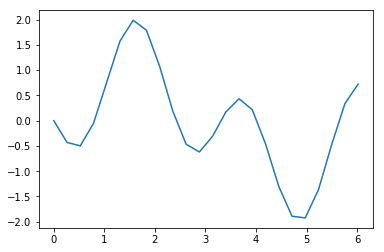

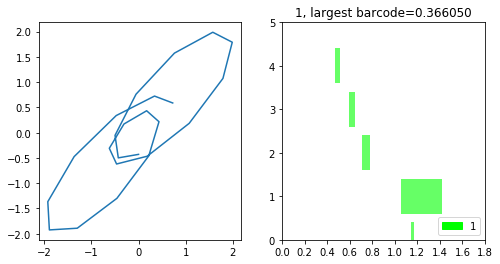

Deprecated parameter. It has been replaced by max_intervals


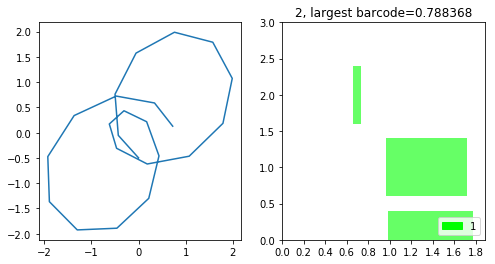

Deprecated parameter. It has been replaced by max_intervals


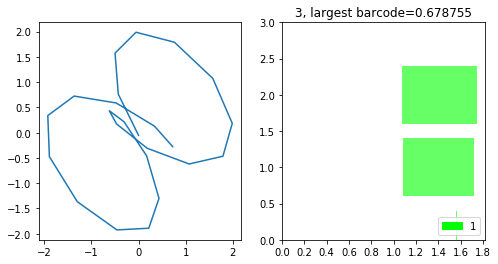

Deprecated parameter. It has been replaced by max_intervals


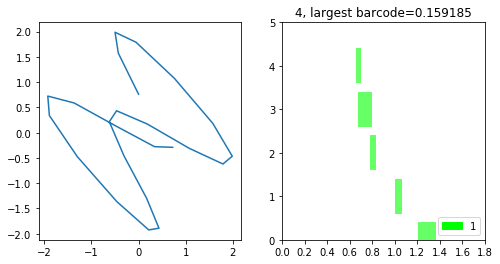

Deprecated parameter. It has been replaced by max_intervals


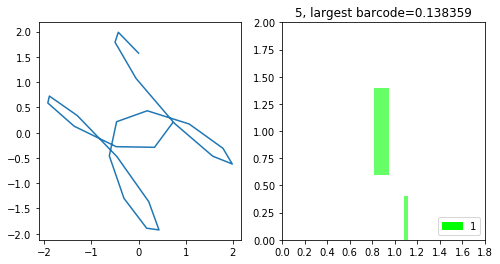

Deprecated parameter. It has been replaced by max_intervals


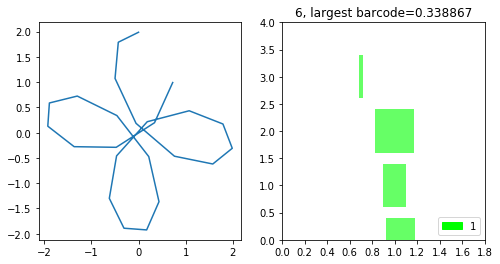

Deprecated parameter. It has been replaced by max_intervals


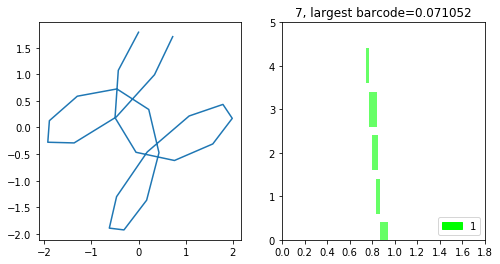

Deprecated parameter. It has been replaced by max_intervals


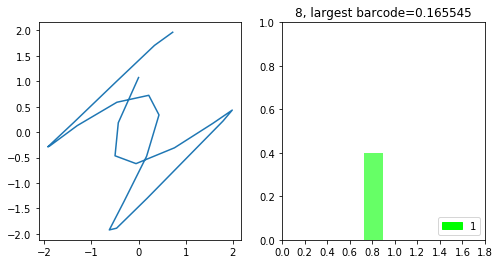

Deprecated parameter. It has been replaced by max_intervals


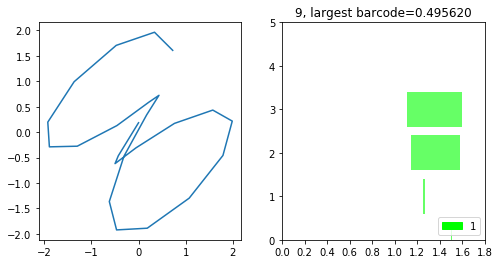

Deprecated parameter. It has been replaced by max_intervals


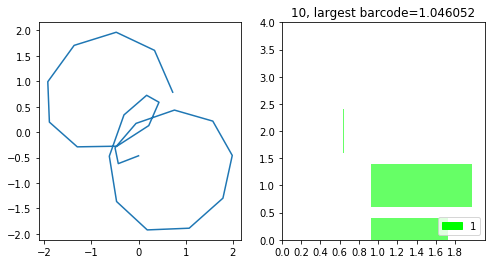

Deprecated parameter. It has been replaced by max_intervals


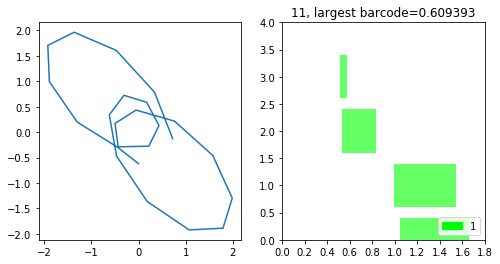

1.0460516773542006


In [81]:
a=2.90
N=24
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
MaxLength=0
Tau=0
for i in range(1,12):
    Array,temp=sine_plot(N,i,a)
    MaxLength=max(MaxLength,temp)
print(MaxLength)

## gap=4pi/240 *12  == pi/5


Deprecated parameter. It has been replaced by max_intervals


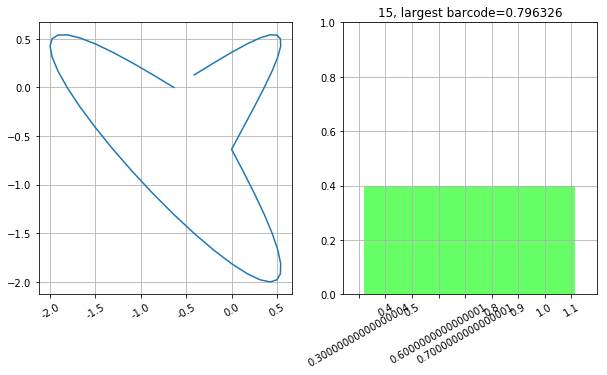

([(0.0, 0.6363792902864165),
  (-0.12968719278598517, 0.8660254037844385),
  (-0.2521572401450382, 1.0919630635488167),
  (-0.36047991100347393, 1.3065629648763764),
  (-0.44828773608402683, 1.5025003625147075),
  (-0.5100301469993836, 1.6730326074756157),
  (-0.5411961001461969, 1.8122548927057758),
  (-0.5384965901842291, 1.915324393885097),
  (-0.5, 1.9786442036418337),
  (-0.42521504738362825, 2.0),
  (-0.3151181035025661, 1.978644203641834),
  (-0.1721237972024765, 1.915324393885097),
  (0.0, 1.8122548927057758),
  (0.1962695744593752, 1.673032607475616),
  (0.4106699079261453, 1.502500362514708),
  (0.6363792902864165, 1.3065629648763772),
  (0.8660254037844385, 1.0919630635488171),
  (1.0919630635488167, 0.8660254037844389),
  (1.3065629648763764, 0.636379290286416),
  (1.5025003625147075, 0.4106699079261452),
  (1.6730326074756157, 0.19626957445937554),
  (1.8122548927057758, 2.220446049250313e-16),
  (1.915324393885097, -0.17212379720247628),
  (1.9786442036418337, -0.31511810

In [44]:
def Center_sine_plot_toPi(N,tau,a): #N은 왠만하면 4의 배수
    x=np.array([Pi*i/N for i in range(N)])
    y=np.sin(x)-np.sin(a*x)   ### 
    extended_x=np.array(list(x)+[2*Pi+e for e in x][:tau])
    extended_y=np.sin(extended_x)-np.sin(a*extended_x) ####
    #fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
   ## axes[0].plot(y[:-tau],y[tau:])
   ## axes[0].set(xlabel='function')
    fig=plt.figure(figsize=(10,5))
    a=fig.add_subplot(1,2,1)
    b=fig.add_subplot(1,2,2)
    xlabels=np.arange(-2,2.5,0.5)
    ylabels=xlabels.copy()
    a.set_xticks(xlabels)#,rotation=30)
    a.set_xticklabels(xlabels,rotation=30)
    xlabels2=np.arange(0,2,0.1)
   
   # axes[0].set_yticklabels(ylabels,rotation=30)
    points=list(zip(list(extended_y[:-tau]),list(extended_y[tau:])))
    centered_points=[Centering(p) for p in points]
   # axes[0].set_yticklabels(ylabels,rotation=30)
    X=[cp[0] for cp in centered_points]
    Y=[cp[1] for cp in centered_points]
    a.plot(X,Y)#,axes=axes[1])
    a.grid(True)
   ## plt.plot(extended_x,extended_y)
   ## plt.show()
    rips = gudhi.RipsComplex(points=centered_points)
    simplex_tree = rips.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
    diag=[x for x in diag if x[0]==1]
 #   print(diag)
    MaxLength=MaxLenBarcode(diag)
   #,rotation=30)
    b.set_xticklabels(xlabels2,rotation=30)
   # axes[0].set_yticklabels(ylabels,rotation=30)

    b.set_xlim(0,2)
    b.set_xticks(xlabels2)
    #print(diag)
    b = gudhi.plot_persistence_barcode(diag)
        
    b.grid(True)
    
    
   # axes[1].xticks(np.arange(0, 2.0, step=0.2))
   # print('maxlength', MaxLength)
    b.title('%d, largest barcode=%f'%(tau, MaxLength))
    plt.show()
    return list(zip(list(extended_y[:-tau]),list(extended_y[tau:]))),MaxLength



## gap=4pi/240 *tau 
Center_sine_plot_toPi(48,15,3)

Deprecated parameter. It has been replaced by max_intervals


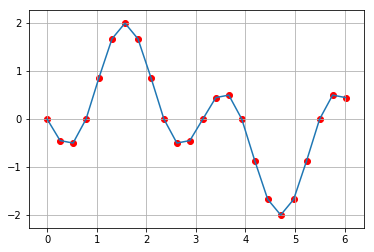

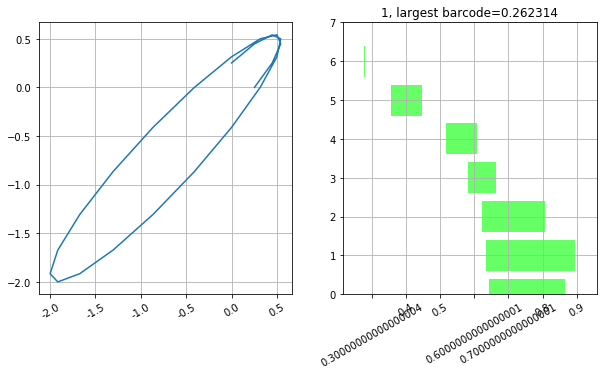

Deprecated parameter. It has been replaced by max_intervals


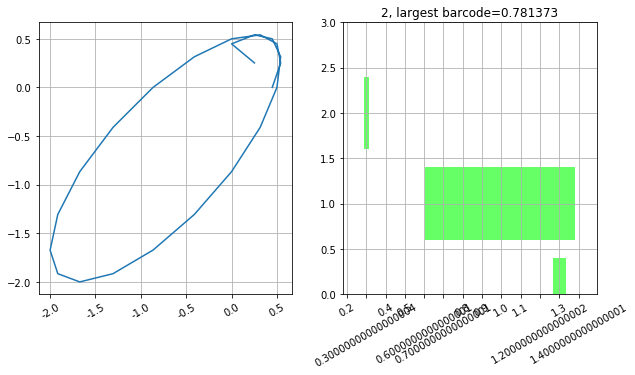

Deprecated parameter. It has been replaced by max_intervals


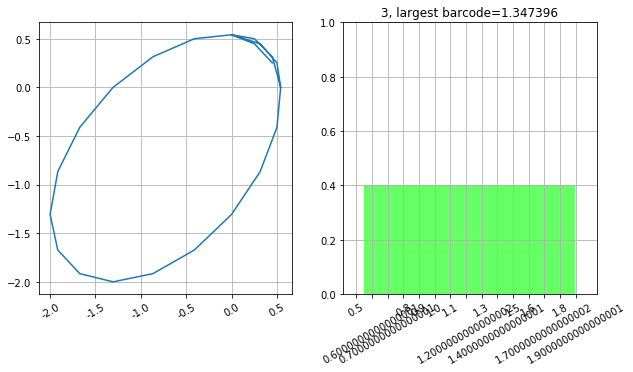

Deprecated parameter. It has been replaced by max_intervals


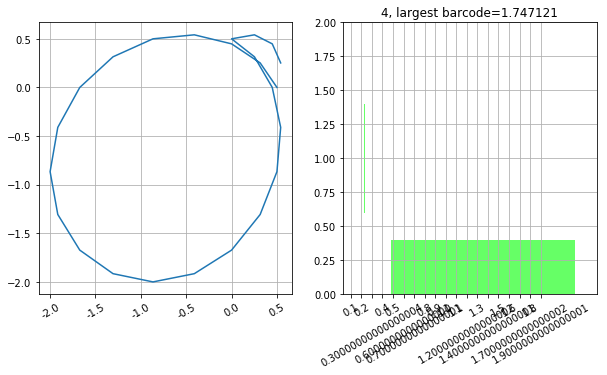

Deprecated parameter. It has been replaced by max_intervals


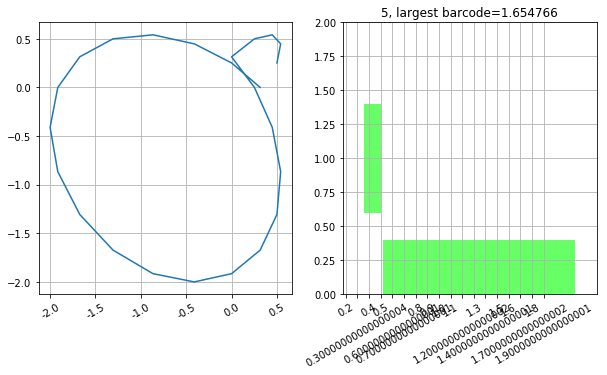

Deprecated parameter. It has been replaced by max_intervals


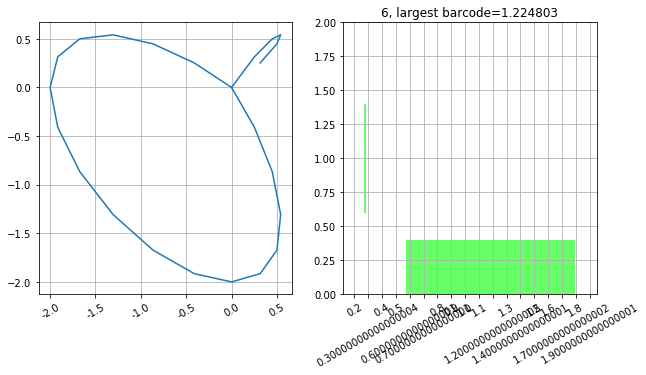

Deprecated parameter. It has been replaced by max_intervals


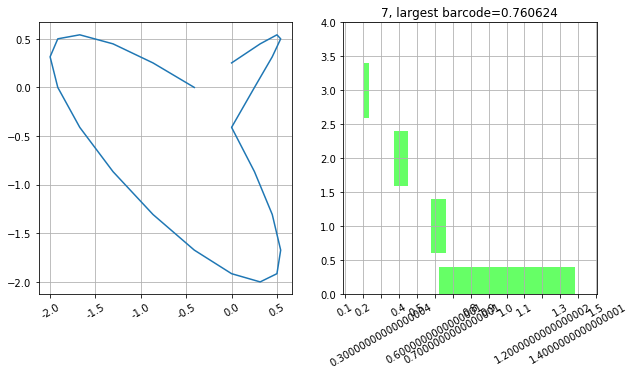

Deprecated parameter. It has been replaced by max_intervals


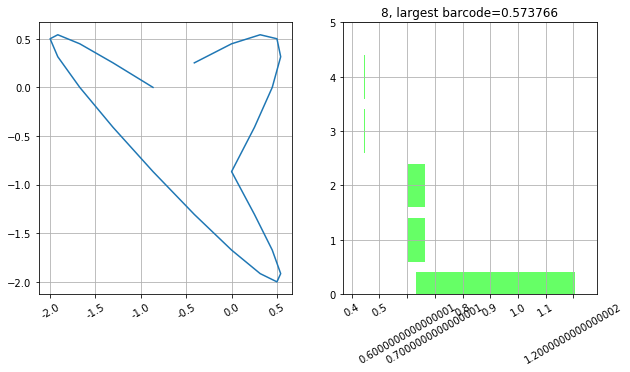

Deprecated parameter. It has been replaced by max_intervals


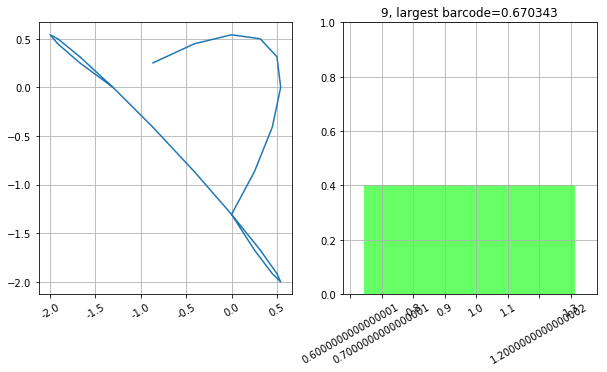

Deprecated parameter. It has been replaced by max_intervals


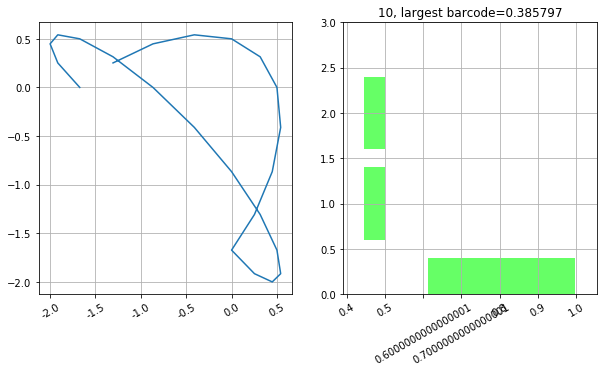

Deprecated parameter. It has been replaced by max_intervals


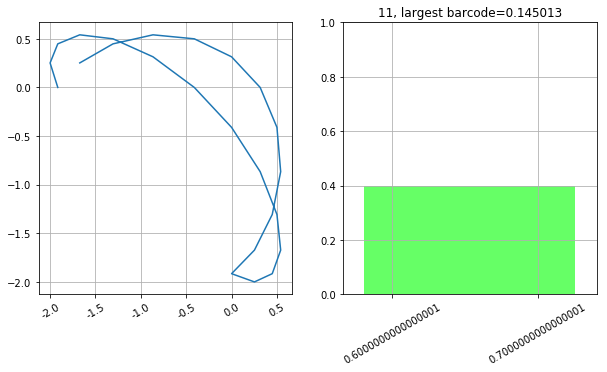

1.7471212604221553


In [45]:
a=3
N=24
x=np.array([2*Pi*i/N for i in range(N)])
y=np.sin(x)-np.sin(a*x)
plt.plot(x,y)
plt.scatter(x,y,color='red')
plt.grid(True)
MaxLength=0
Tau=0
for i in range(1,12):
    Array,temp=Center_sine_plot_toPi(N,i,a)
    MaxLength=max(MaxLength,temp)
print(MaxLength)

Deprecated parameter. It has been replaced by max_intervals


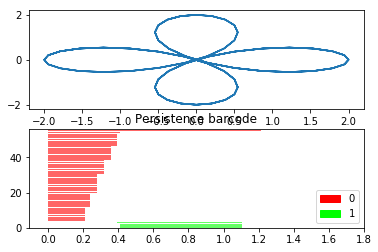

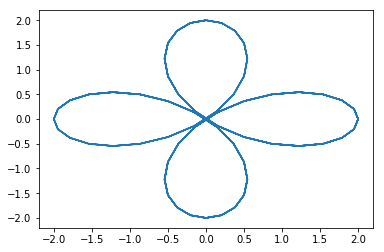

[(1, (0.3907292457226433, 1.1035047187772515)), (1, (0.4107040620870696, 1.1035047187772513)), (1, (0.4107040620870697, 1.1035047187772509)), (1, (0.41070406208707, 1.1035047187772502)), (1, (0.2797727760321779, 0.4175408425663423))]
Deprecated parameter. It has been replaced by max_intervals


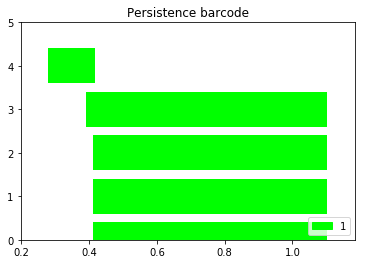

In [40]:

#make circle points

#sine_plot(120,i,3)
cpx = sine_plot(120,15,3)
def extractXY(cpx):
    xs = []
    ys = []
    for el in cpx:
        xs.append(el[0])
        ys.append(el[1])
    return xs, ys

import matplotlib.pyplot as plt

xs, ys = extractXY(cpx)
plt.plot(xs, ys)
plt.show()
            
rips = gudhi.RipsComplex(points=cpx,
                         max_edge_length=42)

simplex_tree = rips.create_simplex_tree(max_dimension=2)


diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.1)
diag=[x for x in diag if x[0]==1]
print(diag)
pplot = gudhi.plot_persistence_barcode(diag,alpha=1,legend=True)
#pplot.show()

In [18]:
def extractXY(cpx):
    xs = []
    ys = []
    for el in cpx:
        xs.append(el[0])
        ys.append(el[1])
    return xs, ys

import matplotlib.pyplot as plt

def plotBarcode(N,i,a):
    complex = sine_plot(N,i,a)
    xs, ys = extractXY(complex)
    plt.plot(xs, ys)
    plt.show()
    rips = gudhi.RipsComplex(points=complex,
                         max_edge_length=42)
    simplex_tree = rips.create_simplex_tree(max_dimension=1)
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.2)
    pplot = gudhi.plot_persistence_barcode(diag)
    pplot.show()

array([[ 0.1 ,  0.15],
       [ 0.2 ,  0.25],
       [ 0.3 ,  0.4 ],
       [ 0.5 ,  0.6 ],
       [ 0.8 ,  1.  ],
       [ 1.5 ,  2.  ],
       [ 2.5 ,  3.  ],
       [ 4.  ,  5.  ],
       [ 6.  ,  8.  ],
       [10.  , 15.  ]])

In [54]:
rips = gudhi.RipsComplex(points=list(zip(list(extended_y[:-tau]),list(extended_y[tau:]))))
simplex_tree = rips.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
diag=[x for x in diag if x[0]==1]
 #   print(diag)
MaxLength=MaxLenBarcode(diag)
gudhi.plot_persistence_barcode(diag)

0.7127754730546083

In [ ]:
xlabels=np.arange(0,6,0.25)
axes[0].set_xticklabels(xlabels,rotation=30)
axes[0].set_yticks(np.arange(-2,2,0.1))
axes[0].plot(x,y)
axes[0].grid(True)